In [5]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [11]:
reader = csv.reader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'), delimiter=',', quotechar='|')

ParamsDict = {}
for row in reader:
    #print(', '.join(row))
    print(row[0])

BINARY
BOLD
FCFC
G
MODEL
  P [min
  P dtype .................. float64
  P shape .................. (1
  Q [min
  Q dtype .................. float64
  Q shape .................. (1
  Type ..................... WilsonCowan
  a_e [min
  a_e dtype ................ float64
  a_e shape ................ (1
  a_i [min
  a_i dtype ................ float64
  a_i shape ................ (1
  alpha_e [min
  alpha_e dtype ............ float64
  alpha_e shape ............ (1
  alpha_i [min
  alpha_i dtype ............ float64
  alpha_i shape ............ (1
  b_e [min
  b_e dtype ................ float64
  b_e shape ................ (1
  b_i [min
  b_i dtype ................ float64
  b_i shape ................ (1
  c_e [min
  c_e dtype ................ float64
  c_e shape ................ (1
  c_ee [min
  c_ee dtype ............... float64
  c_ee shape ............... (1
  c_ei [min
  c_ei dtype ............... float64
  c_ei shape ............... (1
  c_i [min
  c_i dtype ................ float64


In [8]:
reader = csv.DictReader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'))

result = {}
for row in reader:
    print(', '.join(row))

BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True
BINARY, True


In [5]:
dictobj

OrderedDict([('BINARY', 'BOLD'), ('True', 'False')])

In [3]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/LCycle_G[0.4*_.csv")
print(Sim_run_files)

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0

SCM = con.weights

# current_calculator(bold_data,ParamsDict["G"],con.weights)

['do-not-track\\LCycle_G[0.45]_MouseCortex_FCM_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Params_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Scorr_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.45]_MouseCortex_Tseries_20200802-201738_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_FCM_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Params_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Scorr_20200802-201729_.csv', 'do-not-track\\LCycle_G[0.4]_MouseCortex_Tseries_20200802-201729_.csv']
WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [7]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[:,i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

Max 7.073367223534912
Median 1.5870884002065664
Min 0.042109107340267106


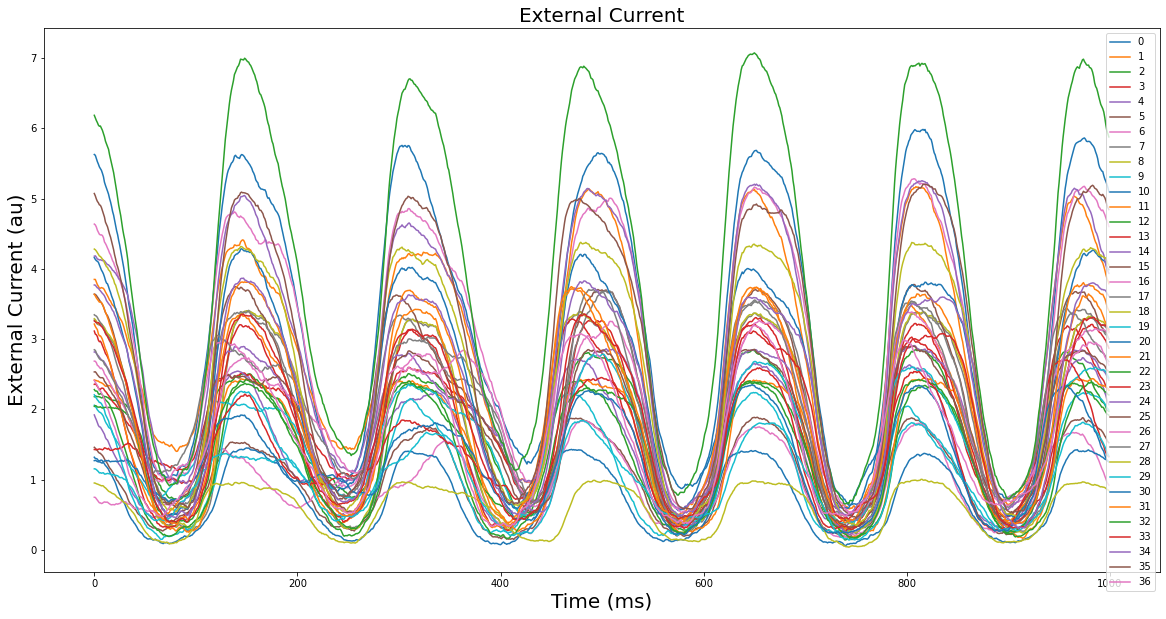

In [10]:
plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

In [67]:
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "3Regions"

# Monitors or not?  (Aka BOLD or not?)
ParamsDict["BOLD"] = False

# Change to Binary Connectome? (If True, will change the connectome into binary)
ParamsDict["BINARY"] = True

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
ParamsDict["Snip"] = 10
# Note, if BOLD = False, Snip gets multiplied by 1000. 
if ParamsDict["BOLD"] == False:
    ParamsDict["Snip"] = 100 * ParamsDict["Snip"]

# Set the Random State/Seed for the Stochastic Integrator:
ParamsDict["RandState"] = 118

# Set Simulation Length:
ParamsDict["Simul_length"] = 1.2e3

# Set Linear Coupling Constant:
ParamsDict["G"] = np.array([0.47])

# Set integrator time step dt.
ParamsDict["dt"] = 0.1

# Remove ith indexed region (7 corresponds to Frontal Pole Cerebral Cortex) - Give it a list if removing multiple regions.  Empty list removes nothing. 
# ParamsDict["REMOVE"] = [7]

# Set Additive Noise strength
ParamsDict["noise"] = np.array([0.000013])  

# Params Dict tag (extra note tags for the name - Example to denote what's being changed/looped.)
ParamsDict["tag"] = "Single"

# Set Wilson Cowan Model Parameters
ParamsDict["MODEL_c_ee"] = np.array([11.0])
ParamsDict["MODEL_c_ei"] = np.array([10.0])
ParamsDict["MODEL_c_ie"] = np.array([10.0])
ParamsDict["MODEL_c_ii"] = np.array([1.0])

# Define the model. 
ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"],
                                        a_e=numpy.array([1.0]),a_i=numpy.array([1.0]),b_e=numpy.array([1.3]),b_i=numpy.array([2.8]),tau_e=numpy.array([10.0]),
                                        tau_i=numpy.array([65.0])) 


# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file("C:\\Users\\Pok Him\\Desktop\\MouseBrainModelling\\Connectomes\\" + ParamsDict["name"] + ".zip")

# Mouse Allen Connectivity (from within TVB)
# con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

# Change to Connectome to Binary if desired:
if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0
'''
# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

# Number of regions
con.number_of_regions = con.weights.shape[0]
'''

WARNING  File 'hemispheres' not found in ZIP.


'\n# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)\ncon.centres = np.delete(con.centres,ParamsDict["REMOVE"])\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)\n\n# Number of regions\ncon.number_of_regions = con.weights.shape[0]\n'

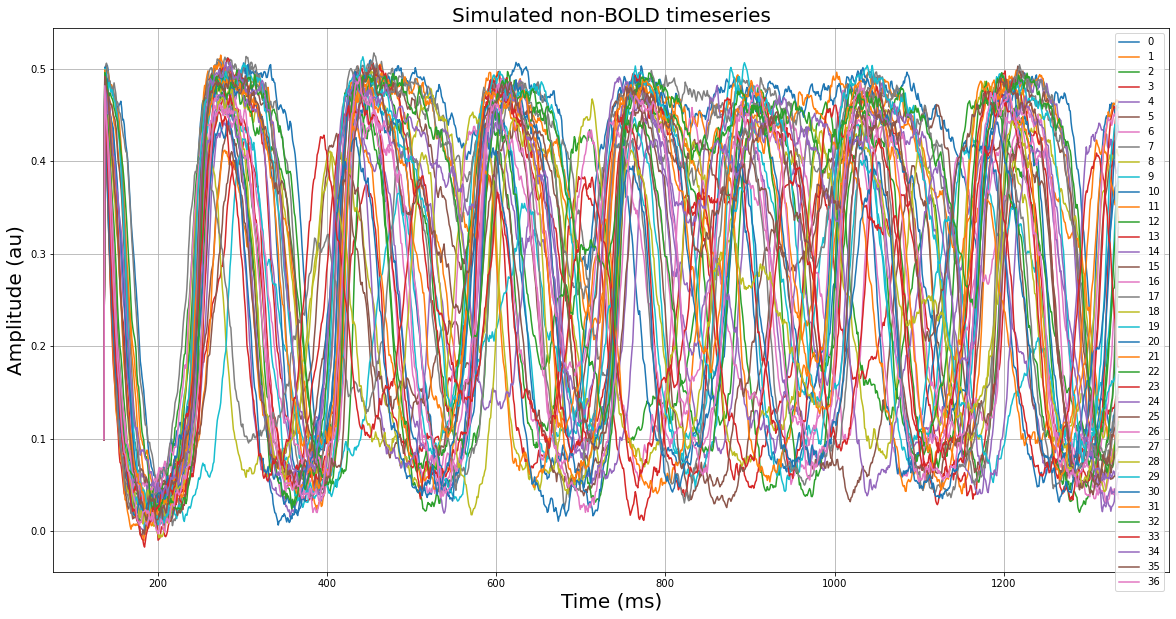

In [64]:
# Set the parameter of the resting state simulation

if ParamsDict["BOLD"] == True:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.HeunStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            monitors=(monitors.Bold(period=2e3),
                                      monitors.TemporalAverage(period=1e3)),
                            simulation_length=ParamsDict["Simul_length"],
                            #initial_conditions=[1.8,1.8,1.8,1.8,1.8]
                            ).configure()
    # Run the resting state simulation
    (bold_time, bold_data), _ = sim.run()

    # Display the simulated bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated BOLD timeseries', fontsize=20)
    plt.legend(('0','1','2','3','4'))

# No Monitors 
else:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.EulerStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            simulation_length=ParamsDict["Simul_length"],
                            initial_conditions=0.5 + numpy.zeros((con.number_of_regions*con.number_of_regions,2,con.number_of_regions,1)), # numpy.ones((n * n, 1, n, 1)),
                            ).configure()
    # Run the resting state simulation
    awer = sim.run()
    bold_time = awer[0][0]
    bold_data = awer[0][1]

    # Display the simulated non-bold timeseries
    # Display the simulated non-bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated non-BOLD timeseries', fontsize=20)
    plt.legend(np.arange(38))
    plt.grid()

In [68]:
con

,value
Number of connections,0
Number of regions,0
Undirected,False
"areas [min, median, max]","[2000, 2000, 2000]"
areas dtype,float64
areas shape,"(3,)"
is empty,True
"tract_lengths (connections) [min, median, max]","[0, 0, 0]"
"tract_lengths [min, median, max]","[0, 0, 0]"
"weights [min, median, max]","[0, 1, 1]"
